In [1]:
from keras.datasets import imdb
 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [43]:
#train_data.shape
#train_labels.shape
#test_data.shape
test_labels.shape

(25000,)

In [44]:
#preparing data
import numpy as np
 
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
 
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [45]:
print(y_train.shape)
print(x_val)

(25000,)
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]]


In [46]:
#network architecture
from keras import models
from keras import layers
 
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

#network compile
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [52]:
# Set a validation set
x_val = x_train[:10000]
x_train2 = x_train[10000:]
y_val = y_train[:10000]
y_train2 = y_train[10000:]

print(x_train2.shape)

(15000, 10000)


In [48]:
#model training
history = network.fit(x_train2, y_train2, batch_size=512, epochs=20, validation_data=(x_val, y_val) )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 12s 806us/step - loss: 0.4995 - accuracy: 0.7896 - val_loss: 0.3703 - val_accuracy: 0.8762
Epoch 2/20
15000/15000 [==============================] - 7s 475us/step - loss: 0.2957 - accuracy: 0.9038 - val_loss: 0.2983 - val_accuracy: 0.8892
Epoch 3/20
15000/15000 [==============================] - 6s 423us/step - loss: 0.2222 - accuracy: 0.9269 - val_loss: 0.2788 - val_accuracy: 0.8909
Epoch 4/20
15000/15000 [==============================] - 6s 431us/step - loss: 0.1735 - accuracy: 0.9435 - val_loss: 0.2732 - val_accuracy: 0.8926
Epoch 5/20
15000/15000 [==============================] - 7s 475us/step - loss: 0.1402 - accuracy: 0.9560 - val_loss: 0.3097 - val_accuracy: 0.8795
Epoch 6/20
15000/15000 [==============================] - 7s 475us/step - loss: 0.1155 - accuracy: 0.9654 - val_loss: 0.2930 - val_accuracy: 0.8882
Epoch 7/20
15000/15000 [==============================] - 8s 

In [49]:
history_dict = history.history
history_dict.keys()
print('\nhistory dict:', history_dict)
print(history_dict.keys())


history dict: {'val_loss': [0.37032782139778136, 0.2983220380306244, 0.2787790053367615, 0.2732329137802124, 0.30974914231300354, 0.29304675602912905, 0.3132177216053009, 0.3308001308441162, 0.3574770205974579, 0.3800271819114685, 0.4206690432071686, 0.43824033484458924, 0.4679973573207855, 0.5099496196269989, 0.5738813626289367, 0.5728446964263916, 0.6840472789764405, 0.6393445463180542, 0.6704010004043579, 0.7149540783882141], 'val_accuracy': [0.8762000203132629, 0.88919997215271, 0.8909000158309937, 0.8925999999046326, 0.8794999718666077, 0.8881999850273132, 0.8852999806404114, 0.8820000290870667, 0.8773000240325928, 0.8788999915122986, 0.8755000233650208, 0.8741000294685364, 0.8743000030517578, 0.8686000108718872, 0.8637999892234802, 0.8715999722480774, 0.8585000038146973, 0.8682000041007996, 0.868399977684021, 0.8668000102043152], 'loss': [0.4995393911679586, 0.29567352911631267, 0.2221772323290507, 0.17346643862724304, 0.14019467219511667, 0.11548495434522629, 0.0964096130649248

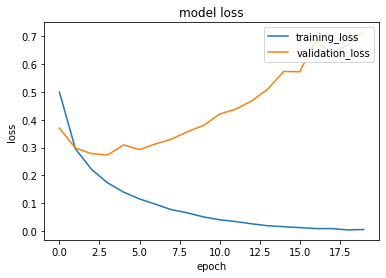

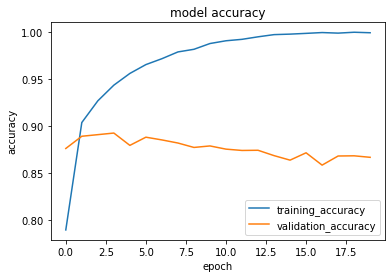

In [50]:
import matplotlib.pyplot as plt

#TODO: plot
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'], loc='lower right')
plt.show()

In [51]:
#evaluate
results = network.evaluate(x_test, y_test)
print('test loss, test accuracy:', results)

25000/25000 [==============================] - 16s 623us/step
test loss, test accuracy: [0.7889362427330017, 0.8500000238418579]
